In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# 下载黄金价格数据
gold = yf.download("GC=F", start="2010-01-01", end="2024-09-23")

[*********************100%%**********************]  1 of 1 completed


In [8]:
gold = gold[gold.index>='2024-01-01']

Strategy Return: 0.27%
Buy and Hold Return: 26.91%
Max Drawdown: -1.34%
Score: 19.91


/var/folders/08/51ch_vwn57lgdw3v47gn9rjh0000gn/T/ipykernel_34095/465344061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['MA20'] = gold['Close'].rolling(window=20).mean()
/var/folders/08/51ch_vwn57lgdw3v47gn9rjh0000gn/T/ipykernel_34095/465344061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['MA50'] = gold['Close'].rolling(window=50).mean()
/var/folders/08/51ch_vwn57lgdw3v47gn9rjh0000gn/T/ipykernel_34095/465344061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

<Axes: xlabel='Date'>

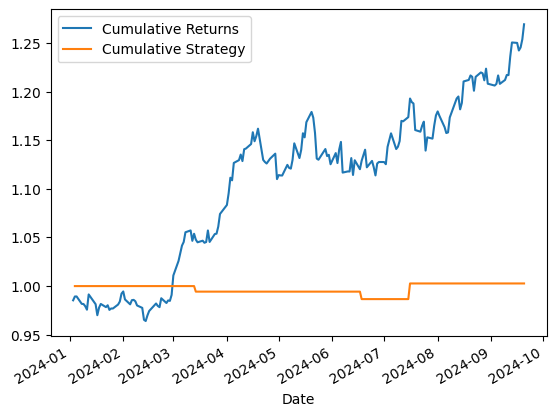

In [12]:
# 计算移动平均线
gold['MA20'] = gold['Close'].rolling(window=20).mean()
gold['MA50'] = gold['Close'].rolling(window=50).mean()

# 生成交易信号
gold['Signal'] = np.where(gold['MA20'] > gold['MA50'], 1, 0)
gold['Position'] = gold['Signal'].diff()

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()

In [14]:
import talib
# 计算RSI
gold['RSI'] = talib.RSI(gold['Close'], timeperiod=14)

# 生成交易信号
gold['Signal'] = np.where(gold['RSI'] < 30, 1, np.where(gold['RSI'] > 70, -1, 0))
gold['Position'] = gold['Signal'].diff()

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()

ModuleNotFoundError: No module named 'talib'

In [15]:
# 计算布林带
gold['Upper'], gold['Middle'], gold['Lower'] = talib.BBANDS(gold['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# 生成交易信号
gold['Signal'] = np.where(gold['Close'] <= gold['Lower'], 1, np.where(gold['Close'] >= gold['Upper'], -1, 0))
gold['Position'] = gold['Signal'].diff()

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()

NameError: name 'talib' is not defined

In [ ]:
from talib import EMA
# 计算EMA
gold['EMA5'] = EMA(gold['Close'], timeperiod=5)
gold['EMA21'] = EMA(gold['Close'], timeperiod=21)
gold['EMA63'] = EMA(gold['Close'], timeperiod=63)

# 生成交易信号
gold['Signal'] = np.where((gold['EMA5'] > gold['EMA21']) & (gold['EMA21'] > gold['EMA63']), 1, 0)
gold['Position'] = gold['Signal'].diff()

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()

In [ ]:
from talib import MACD

# 计算MACD
gold['MACD'], gold['Signal'], _ = MACD(gold['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# 生成交易信号
gold['Position'] = np.where(gold['MACD'] > gold['Signal'], 1, np.where(gold['MACD'] < gold['Signal'], -1, 0))
gold['Signal'] = gold['Position'].diff()

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()

In [ ]:
from talib import ROC, ATR


# 计算指标
gold['High20'] = gold['High'].rolling(window=20).max()
gold['ROC14'] = ROC(gold['Close'], timeperiod=14)
gold['ATR10'] = ATR(gold['High'], gold['Low'], gold['Close'], timeperiod=10)

# 生成交易信号
gold['Signal'] = np.where((gold['Close'] > gold['High20'].shift(1)) & (gold['ROC14'] > 0), 1, 0)
gold['StopLoss'] = gold['Close'] - 2 * gold['ATR10']

# 实现移动止损
position = 0
signals = []
for i in range(len(gold)):
    if position == 0 and gold['Signal'].iloc[i] == 1:
        position = 1
        signals.append(1)
    elif position == 1 and (gold['Close'].iloc[i] < gold['StopLoss'].iloc[i] or gold['ROC14'].iloc[i] < 0):
        position = 0
        signals.append(-1)
    else:
        signals.append(0)

gold['Position'] = signals

# 计算回报
gold['Returns'] = np.log(gold['Close'] / gold['Close'].shift(1))
gold['Strategy'] = gold['Position'].shift(1) * gold['Returns']

# 计算累积回报
gold['Cumulative Returns'] = gold['Returns'].cumsum().apply(np.exp)
gold['Cumulative Strategy'] = gold['Strategy'].cumsum().apply(np.exp)

# 计算最大回撤
def max_drawdown(returns):
    cumulative = returns.cumsum().apply(np.exp)
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown.min()

strategy_return = gold['Cumulative Strategy'].iloc[-1] - 1
buy_hold_return = gold['Cumulative Returns'].iloc[-1] - 1
max_dd = max_drawdown(gold['Strategy'])

score = abs((strategy_return - buy_hold_return) / max_dd)

print(f"Strategy Return: {strategy_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Score: {score:.2f}")
gold[['Cumulative Returns','Cumulative Strategy']].plot()